In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


I use a dataset from https://www.kaggle.com/datasets, which is a summary of NBA players basic information. The variables in the dataset include name, start-year, end-year, position, height, weight, birthday and college. I make up two graphs based on the given information in bar chart and scatter plot chart respectively.

In [4]:
player=read_csv(
    "https://raw.githubusercontent.com/Chengye1996/bios512/master/player_data.csv") %>%
    as_tibble
    
player %>% head

Parsed with column specification:
cols(
  name = col_character(),
  year_start = col_double(),
  year_end = col_double(),
  position = col_character(),
  height = col_character(),
  weight = col_double(),
  birth_date = col_character(),
  college = col_character()
)


name,year_start,year_end,position,height,weight,birth_date,college
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,6-6,223,"November 3, 1974",San Jose State University
Shareef Abdur-Rahim,1997,2008,F,6-9,225,"December 11, 1976",University of California


It is always controversial that which college is the best basketball college. Sometimes the number of NCAA titles can provide powerful evidence, but that is a measure for success of teamwork. The production of NBA players can illustrate how many brilliant basketball players had played for the college. Here I select the players entering NBA after 2000 so that it would be more meaningful to the comtemporary trend. According to the graph, University of Kentucky has the most NBA players(45), followed by Duke University(38) and University of Kansas(33) in order. University of North Carolina ranks 6th with 25 NBA players among all the colleges. It seems Duke is more competitive than UNC in basketball since 21 century.

In [3]:
college.2000 = player %>%
         filter(year_start>= 2000) %>%
         drop_na(college)%>%
         mutate(college=fct_infreq(college)%>%fct_lump(n=10)%>%fct_rev)%>%
         print

# A tibble: 1,153 x 8
   name    year_start year_end position height weight birth_date   college      
   <chr>        <dbl>    <dbl> <chr>    <chr>   <dbl> <chr>        <fct>        
 1 Alex A…       2006     2009 G        6-5       185 January 21,… Other        
 2 Quincy…       2013     2018 F        6-7       240 October 6, … Other        
 3 Hassan…       2007     2009 G        6-4       220 June 20, 19… University o…
 4 Jordan…       2015     2016 G        6-5       209 July 8, 1994 University o…
 5 Steven…       2014     2018 C        7-0       255 July 20, 19… Other        
 6 Bam Ad…       2018     2018 C-F      6-10      243 July 18, 19… University o…
 7 Jeff A…       2011     2015 F        6-7       245 February 10… University o…
 8 Arron …       2008     2018 G        6-5       210 October 15,… University o…
 9 Mauric…       2007     2011 G        6-5       202 February 9,… Michigan Sta…
10 Blake …       2008     2012 G        6-2       190 May 27, 1984 Other        
# … wi

In [4]:
library(gridExtra)
library(scales)
library(grid)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

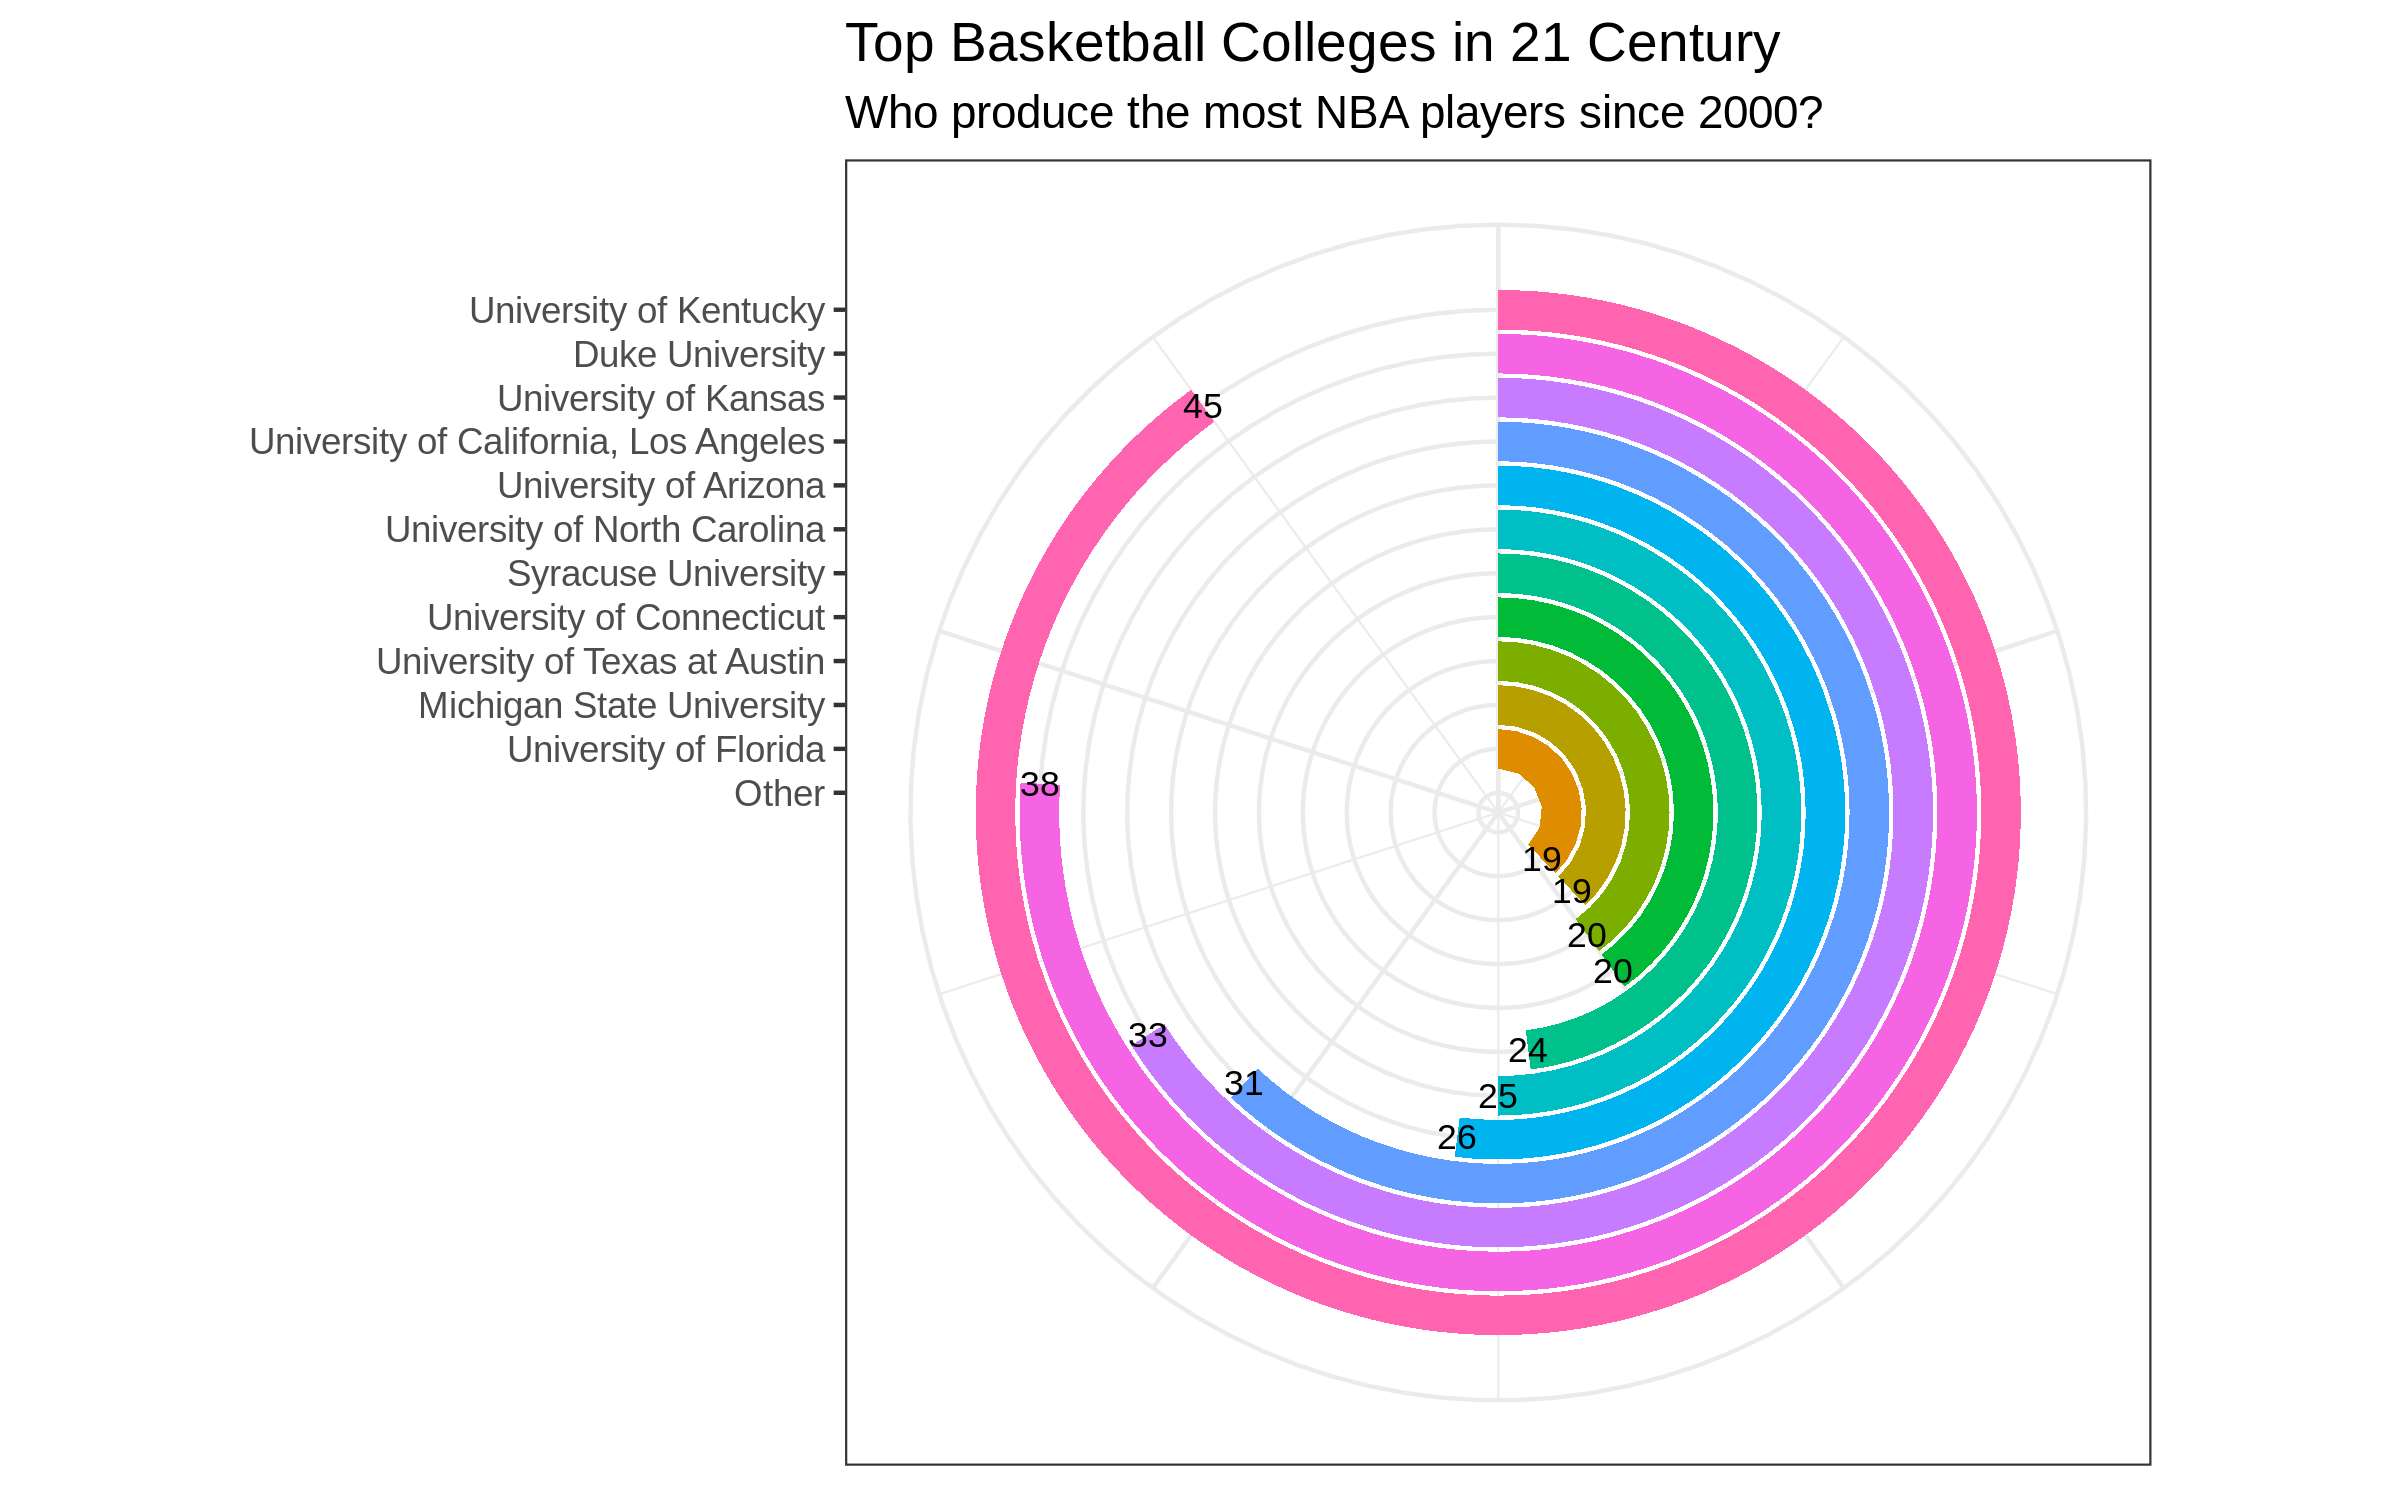

In [5]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 5)

p = ggplot(college.2000, aes(x= college, y=..count..,fill=college),width= 0.6) + geom_bar() + coord_polar(theta="y") 

p = p + geom_text(stat='count',aes(label = ..count..),size = 3,vjust=0.5)

p = p + theme_bw()

p = p + theme(axis.text.x = element_blank(), axis.title.x = element_blank(), axis.title.y= element_blank())

p = p + theme(legend.position = 'none',
              strip.background = element_blank()) 

p = p + ylim(c(0,50))

p = p + labs(title = "Top Basketball Colleges in 21 Century",
             subtitle = "Who produce the most NBA players since 2000?")

p

With limited data, I try to explore the association between weight and position with data of players entering NBA between 1990 and 1992. The weights of NBA players in this period ranged from 150 lbs to 275 lbs. It seems the weights of Centers were around 250 lbs while the figures for Fowards were around 225 lbs and Guards around 175 lbs. Most career length of these player are between 8 and 16 years. No significant association beteen career length and position/weight is observed. 

In [5]:
wp = player %>%
            filter(year_start %in% c(1990,1991,1992))%>%
            drop_na(position,weight,height) 

Warning message:
“Removed 2 rows containing missing values (geom_point).”

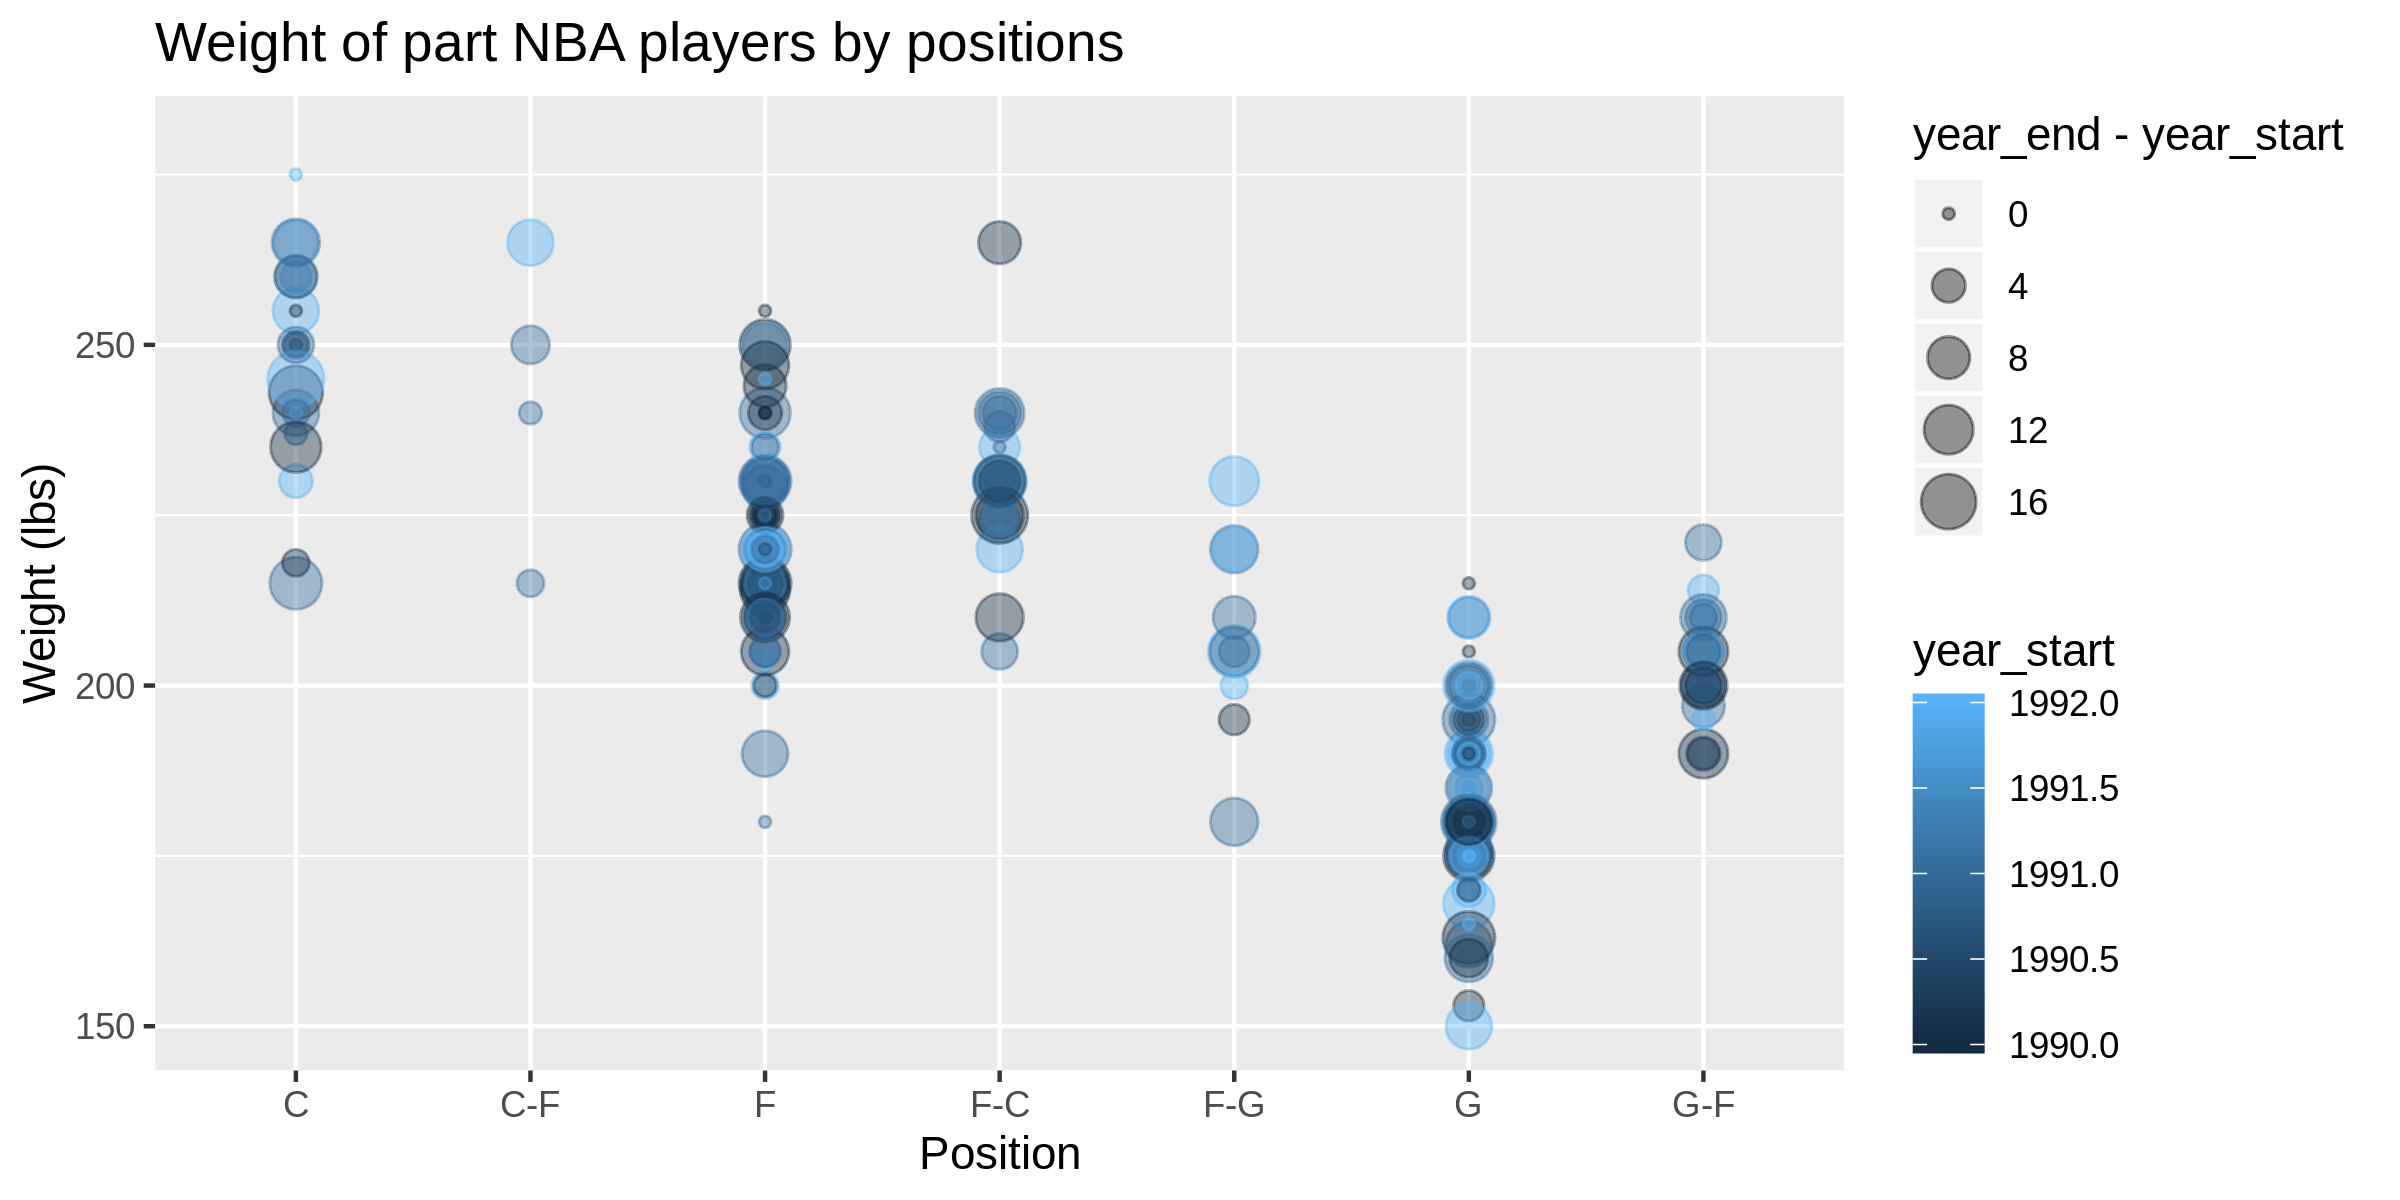

In [6]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 4)

p = ggplot(wp, aes(x = position, y = weight,color = year_start,size = year_end-year_start))

p = p + geom_point(alpha = 0.4)

p = p + ylim(c(150,280))

p = p + labs(y = 'Weight (lbs)', x = 'Position')

p = p + scale_alpha(guide =FALSE)

p = p + labs(title = "Weight of part NBA players by positions")

p